# Playing with Classifiers

## Integration test with Genetic Search
This section of notebook tests checks that classifiers can be used with Genetic Search. It is essentially the pipe example for segmentors, but using classifiers.

## Playing with Toy Dataset
The goal of this section is to recreate the **toy example** provided by the Sklearn tutorial at this [link](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html).
We assume that the toy example used manually tuned classifiers to attain reasonably good fitness scores.
We will use genetic search to find tuned classifiers that have a **similar fitness scores** for the
same data sets.

In [1]:
from see.classifiers import Classifier
from see.classifier_fitness import ClassifierFitness
from see.Workflow import workflow


# Initialize Algorithm Space and Workflow
algorithm_space = Classifier.algorithmspace

workflow.addalgos([Classifier, ClassifierFitness])
wf = workflow()
print(wf)

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from see.base_classes import pipedata
from see.classifier_helpers import helpers
import numpy as np

# Create Data: Sklearn tutorial toy datasets
## Moons
moons_ds = pipedata()
moons_ds.name = 'Moons Dataset'
moons_ds.X, moons_ds.y = make_moons(noise=0.3, random_state=0)

## Circles
circles_ds = pipedata()
circles_ds.name = 'Circles Dataset'
circles_ds.X, circles_ds.y = make_circles(noise=0.2, factor=0.5, random_state=1)

## Linearly Seperable dataset
lin_ds = pipedata()
lin_ds.X, lin_ds.y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
lin_ds.name = 'Linearly Sepearble Dataset'
lin_ds.X += 2 * rng.uniform(size=lin_ds.X.shape)

datasets = [moons_ds, circles_ds, lin_ds]
validation_sets = []

# Preprocess data
for ds in datasets:
    ds.X = StandardScaler().fit_transform(ds.X)
    
# Split datasets into training, testing, and validation sets
for i, ds in enumerate(datasets):
    temp = helpers.generate_train_test_set(ds.X, ds.y)
    validation_sets.append(temp.testing_set)
    datasets[i] = helpers.generate_train_test_set(temp.training_set.X, temp.training_set.y)
    datasets[i].name = ds.name

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	activation = relu
	alpha = 0.0001
	C = 1
	gamma = scale
	kernel = rbf
	learning_rate = 0.1
	max_depth = None
	max_iter = 200
	n_estimators = 100
	n_neighbors = 5
	solver = adam
	var_smoothing = 1e-09



In [2]:
%%time
from see import GeneticSearch
num_generations = 2
hof_per_dataset = []

for ds in datasets:
    print('Running ', ds.name)
    my_evolver = GeneticSearch.Evolver(workflow, ds, pop_size=10)
    my_evolver.run(ngen=num_generations)
    hof_per_dataset.append(my_evolver.hof) # Store the best solution found for each dataset

Running  Moons Dataset
Initializing a new random population
Generation 0/2 of population size 10
<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	activation = logistic
	alpha = 0.0001
	C = 1000000
	gamma = 0.001
	kernel = sigmoid
	learning_rate = 1
	max_depth = None
	max_iter = 200
	n_estimators = 550
	n_neighbors = 16
	solver = lbfgs
	var_smoothing = 0.0001

Time: 0.007 s
fitness=0.125

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	activation = relu
	alpha = 1e-06
	C = 1000
	gamma = 1
	kernel = rbf
	learning_rate = 0.001
	max_depth = 11
	max_iter = 300
	n_estimators = 1000
	n_neighbors = 3
	solver = sgd
	var_smoothing = 10000000000000000

Time: 0.003 s
fitness=0.20833333333333334

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Quadratic Discriminant Analysis
	activation = relu
	alpha = 0.0001
	C = 100
	gamma = scale
	kernel = linear
	learning_rate = 0.1
	max_depth = 19
	max_iter = 600
	n_estimators = 500
	n_neighbors 

Time: 0.567 s
fitness=0.4583333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	activation = relu
	alpha = 1e-06
	C = 1000000
	gamma = 1
	kernel = sigmoid
	learning_rate = 1
	max_depth = 8
	max_iter = 900
	n_estimators = 200
	n_neighbors = 16
	solver = lbfgs
	var_smoothing = 1000000000000

Time: 0.359 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Extra Trees
	activation = relu
	alpha = 0.0001
	C = 10
	gamma = 100
	kernel = rbf
	learning_rate = 0.001
	max_depth = 11
	max_iter = 600
	n_estimators = 500
	n_neighbors = 29
	solver = lbfgs
	var_smoothing = 100000000000000

Time: 0.589 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Quadratic Discriminant Analysis
	activation = relu
	alpha = 0.1
	C = 10
	gamma = 100
	kernel = linear
	learning_rate = 1
	max_depth = 11
	max_iter = 600
	n_estimators = 950
	n_neighbors = 29
	solver = lbfgs
	var_smoothing = 100000000000000

Time: 

/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Time: 0.733 s
fitness=0.25

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Extra Trees
	activation = logistic
	alpha = 0.0001
	C = 100000
	gamma = scale
	kernel = linear
	learning_rate = 0.01
	max_depth = 24
	max_iter = 800
	n_estimators = 50
	n_neighbors = 12
	solver = adam
	var_smoothing = 10000000000

Time: 0.059 s
fitness=0.20833333333333334

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Logistic Regression
	activation = tanh
	alpha = 0.0001
	C = 1000000
	gamma = 10000
	kernel = poly
	learning_rate = 1e-05
	max_depth = 7
	max_iter = 700
	n_estimators = 900
	n_neighbors = 18
	solver = sgd
	var_smoothing = 1e-11

Time: 0.004 s
fitness=0.6666666666666666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	activation = relu
	alpha = 1e-05
	C = 100000
	gamma = auto
	kernel = poly
	learning_rate = 0.1
	max_depth = 21
	max_iter = 1000
	n_estimators = 700
	n_neighbors = 5
	solver = lbfgs
	var_smoothing = 10000000000000000

Time: 0.005 s
fi

/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Time: 0.495 s
fitness=0.25

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gradient Boosting
	activation = identity
	alpha = 1e-06
	C = 10
	gamma = scale
	kernel = linear
	learning_rate = 0.1
	max_depth = 30
	max_iter = 300
	n_estimators = 250
	n_neighbors = 26
	solver = adam
	var_smoothing = 1000000000000000000

Time: 0.174 s
fitness=0.20833333333333334

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gradient Boosting
	activation = identity
	alpha = 0.01
	C = 1000
	gamma = 10000
	kernel = poly
	learning_rate = 0.1
	max_depth = 27
	max_iter = 1000
	n_estimators = 550
	n_neighbors = 7
	solver = adam
	var_smoothing = 0.01

Time: 0.39 s
fitness=0.25

#BEST [0.16666666666666666,  ['Gaussian Process', 'logistic', 0.0001, 100000, 'scale', 'linear', 0.01, 24, 800, 50, 12, 'adam', 10000000000]]
Mutating Population
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping 

/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Time: 0.893 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gradient Boosting
	activation = tanh
	alpha = 1e-06
	C = 10
	gamma = 0.01
	kernel = sigmoid
	learning_rate = 0.1
	max_depth = 22
	max_iter = 100
	n_estimators = 600
	n_neighbors = 13
	solver = adam
	var_smoothing = 1e-05

Time: 0.356 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	activation = identity
	alpha = 0.0001
	C = 10000
	gamma = 1000
	kernel = linear
	learning_rate = 1e-05
	max_depth = 21
	max_iter = 400
	n_estimators = 350
	n_neighbors = 17
	solver = adam
	var_smoothing = 1e-16

Time: 0.002 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gradient Boosting
	activation = identity
	alpha = 0.1
	C = 100
	gamma = 0.001
	kernel = poly
	learning_rate = 1
	max_depth = 24
	max_iter = 200
	n_estimators = 600
	n_neighbors = 7
	solver = adam
	var_smoothing = 100000

Time: 0.343 s
fitness=0.0

Time: 0.688 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	activation = identity
	alpha = 0.001
	C = 10
	gamma = scale
	kernel = poly
	learning_rate = 0.01
	max_depth = 1
	max_iter = 700
	n_estimators = 150
	n_neighbors = 9
	solver = lbfgs
	var_smoothing = 10

Time: 0.003 s
fitness=0.16666666666666666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Linear Discriminant Analysis
	activation = logistic
	alpha = 1e-05
	C = 100
	gamma = 1e-05
	kernel = rbf
	learning_rate = 0.01
	max_depth = 9
	max_iter = 900
	n_estimators = 950
	n_neighbors = 26
	solver = lbfgs
	var_smoothing = 10000000000

Time: 0.002 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Extra Trees
	activation = tanh
	alpha = 1e-05
	C = 10000
	gamma = 1000000
	kernel = rbf
	learning_rate = 0.001
	max_depth = 7
	max_iter = 400
	n_estimators = 750
	n_neighbors = 22
	solver = lbfgs
	var_smoothing = 0.0001

Time: 0.96

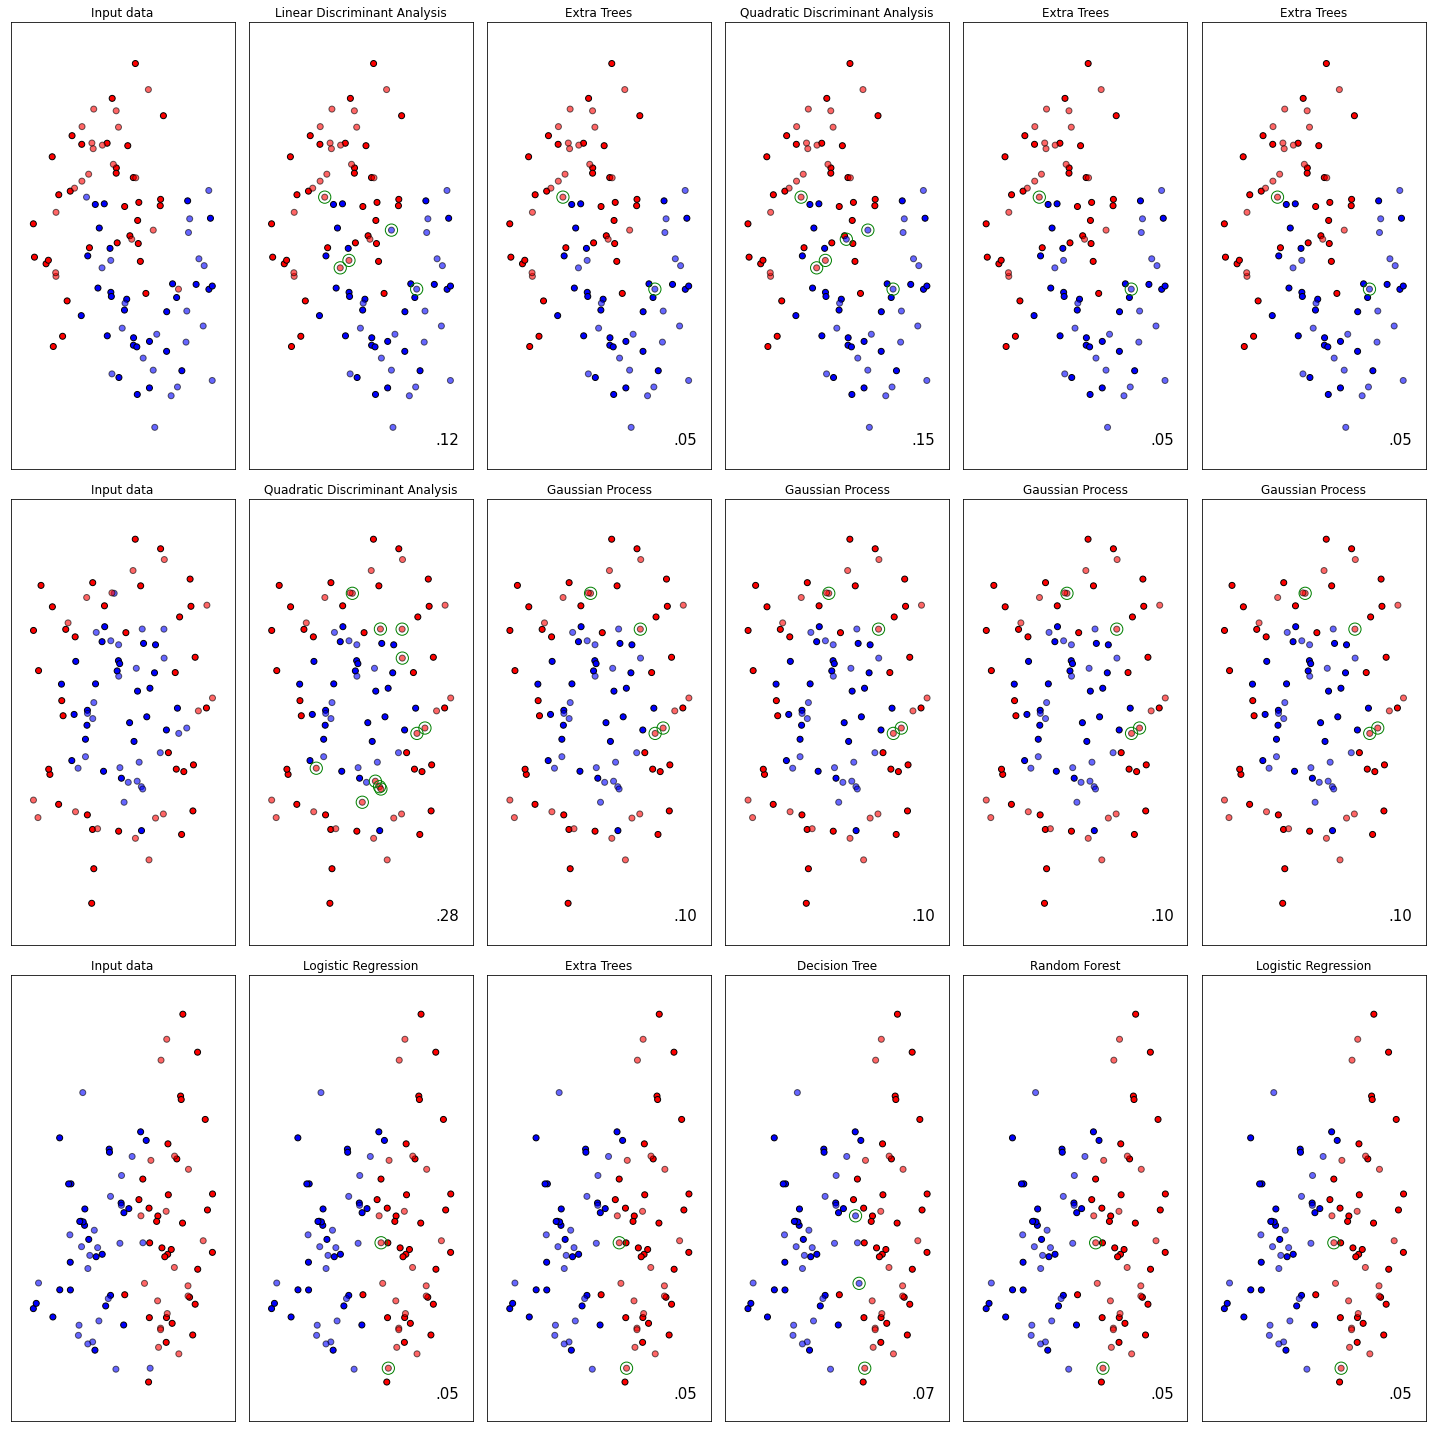

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# For these plots we perform our validation test

# Color Maps
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

figure = plt.figure(figsize=(20, 20))

i = 1
for j, ds in enumerate(datasets):
    # We will test the found top five best algorithms
    # We train the datasets in the same way done during genetic search
    # We test against the validation set
    top_n = 5
    training_set = pipedata()
    training_set.X = np.concatenate((ds.training_set.X, ds.testing_set.X), axis=0)
    training_set.y = np.concatenate((ds.training_set.y, ds.testing_set.y), axis=0)

    testing_set = validation_sets[j]
    
    # Create Mesh Grid
    h = 0.02
    
    X = np.concatenate((training_set.X, testing_set.X), axis=0)
    y = np.concatenate((training_set.y, testing_set.y), axis=0)
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

    ax = plt.subplot(len(datasets), top_n+1, i)

    # Plot the training points and testing points (Input data)
    ax.scatter(training_set.X[:, 0], training_set.X[:, 1], c=training_set.y, cmap=cm_bright,
               edgecolors='k')
    ax.scatter(testing_set.X[:, 0], testing_set.X[:, 1], c=testing_set.y, cmap=cm_bright, alpha=0.6,
           edgecolors='k')

    # Format plot
    ax.set_title("Input data")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i+=1
    hof = hof_per_dataset[j]

    top_inds = hof[:top_n]
    #print(top_inds)
    for ind in top_inds:
        # Initialize classifier
        #print(ind)
        algo_name = ind[0]
        param_list = ind

        clf = Classifier.algorithmspace[algo_name](param_list)

        predictions = clf.evaluate(training_set, testing_set)

        score = ClassifierFitness().evaluate(predictions, testing_set.y)

        ax = plt.subplot(len(datasets), top_n+1, i)

        # Plot the training points and testing points (Input data)
        ax.scatter(training_set.X[:, 0], training_set.X[:, 1], c=training_set.y, cmap=cm_bright,
                   edgecolors='k')
        # Plot predictions and fitness score
        ax.scatter(testing_set.X[:, 0], testing_set.X[:, 1], c=predictions, cmap=cm_bright, alpha=0.6,
               edgecolors='k')

        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')

        # Highlight/circle errors
        errors = testing_set.X[predictions != testing_set.y]

        for mistake in errors:
            #err = testing_set.X[mistake,:]
            ax.scatter(mistake[0], mistake[1], marker='o', s=150, lw=1, color="green", facecolor="none")

        # Format plot
        ax.set_title(algo_name)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        #print(i)
        i+=1

plt.tight_layout()